In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import warnings

In [2]:
warnings.filterwarnings(action = 'ignore')

In [3]:
df  = pd.read_csv('bengaluru_house_prices.csv')

In [4]:
df.tail(20)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13300,Plot Area,Ready To Move,Hosakerehalli,5 Bedroom,NaN,1500,6.0,2.0,145.00
13301,Super built-up Area,Ready To Move,Kothanur,3 BHK,NaN,1454,3.0,3.0,71.50
13302,Super built-up Area,Ready To Move,Annaiah Reddy Layout,2 BHK,NaN,1075,2.0,2.0,48.00
13303,Plot Area,Ready To Move,Vidyaranyapura,5 Bedroom,NaN,774,5.0,3.0,70.00
13304,Super built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,GrrvaGr,1187,2.0,2.0,40.14
13305,Carpet Area,Ready To Move,Hulimavu,1 BHK,NaN,500,1.0,3.0,220.00
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,NaN,1200,5.0,NaN,325.00
13307,Built-up Area,Ready To Move,Billekahalli,3 BHK,NaN,1805,3.0,3.0,134.00
13308,Built-up Area,Ready To Move,Bannerghatta Road,3 BHK,Baanise,1527,3.0,1.0,142.00
13309,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,IBityin,1675,3.0,NaN,92.13


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.shape

(13320, 9)

In [7]:
# Dropping value
df1 = df.drop(columns = ['area_type','availability','society'])

In [8]:
df1

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [9]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [10]:
# Filling null values with median 

bath_median = df1.bath.median()
balcony_median = df1.balcony.median()
df1['bath'].fillna(bath_median,inplace = True)
df1['balcony'].fillna(bath_median,inplace = True)


In [11]:
# Removing all the nan values
df1.dropna(inplace = True)

In [12]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
# Splitting the df1['size'] using split and then storing it in new column 'bhk'
df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [14]:
df1

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,2.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [15]:
# Checking for bhk greater than 20
df1[df1.bhk > 20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [16]:
# Fuction checks in the total sqft is float or string , if float it return True or else False
def is_float(x):
    try:
        float(x)
    except:
        return False 
    return True

In [17]:
# negate symbol is used (~) to get the values having "-" in them 
df1[~df1['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2


In [18]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
# Fuction used to split the joined values(eg: 2100-2850) and store it in tokens(will have 2 values eg:[0]2100 [1]2850)
# Once token is formed then we find the avg and return it 
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [20]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [21]:
# Appling the convert function and calculating the avg
df1['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df1.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


In [22]:
df1.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [23]:
# Finding price per sqft 
df1['price_per_sqft'] = df1['price']*100000/df1['total_sqft']

In [24]:
df1.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [25]:
# Finding the number of data points for each location 
location_stats = df1.location.value_counts()
print(location_stats.to_string())

location
Whitefield                                            539
Sarjapur  Road                                        397
Electronic City                                       302
Kanakpura Road                                        273
Thanisandra                                           234
Yelahanka                                             212
Uttarahalli                                           186
Hebbal                                                177
Marathahalli                                          175
Raja Rajeshwari Nagar                                 171
Hennur Road                                           152
Bannerghatta Road                                     152
7th Phase JP Nagar                                    149
Haralur Road                                          142
Electronic City Phase II                              132
Rajaji Nagar                                          107
Chandapura                                            100
Bella

In [26]:
# Dimentionality Curse : here if we do OHE then we will get 1304 columns which is excess
len(df1.location.unique())

1304

In [27]:
#Checking for values that is having less than 10 data points 
len(location_stats[location_stats<=10])

1063

In [28]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [29]:
# Converting the value having data points less than 10 with "Other"
df1['location'] = df1['location'].apply(lambda x : 'other' if x in location_stats_less_than_10 else x)

In [30]:
df1

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,10407.336319


In [31]:
len(df1.location.unique())

242

In [32]:
df1.head(10)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,2.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,2.0,370.00,6,36274.509804


# OutLier removal

In [34]:
# Shows the number of outliers
df1[df1['total_sqft']/df1['bhk'] < 300]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,2.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,2.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,3.0,70.0,5,9043.927649


### Created a new data frame with no ouliers

In [36]:
# '~' will give the opp ie those which are not outliers 
df2 = df1[~(df1['total_sqft']/df1['bhk'] < 300)]

In [37]:
df2.shape

(12559, 8)

In [38]:
df2.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [39]:
df2.price_per_sqft.describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [40]:
df2.shape

(12559, 8)

In [41]:
len(df2.location.unique())

242

### Example for removing  our liers

In [43]:
# price_per_sqft
# 5000
# 5200
# 10000 (outlier)
# 4900

# m = np.mean([5000, 5200, 10000, 4900])  # Mean
# st = np.std([5000, 5200, 10000, 4900])  # Standard Deviation

# m - st = 6275 - 2478 = 3797
# m + st = 6275 + 2478 = 8753

# 5000	✅ 5000 > 3797 and 5000 ≤ 8753	✅ Yes
# 5200	✅ 5200 > 3797 and 5200 ≤ 8753	✅ Yes
# 10000	❌ 10000 > 3797 but 10000 > 8753	❌ No
# 4900	✅ 4900 > 3797 and 4900 ≤ 8753	✅ Yes

In [44]:
# Here the data set is normally distributed ie here the mean value is zero and the standard deviation is 1
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [45]:
df3 = remove_pps_outliers(df2)  # removing outliers and storing in the df3

In [46]:
df3.shape

(10289, 8)

In [47]:
df1.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [48]:
def plot_scatter_chart(df,location):
    bhk2 = df3[(df3.location == location) & (df3.bhk == 2)]
    bhk3 = df3[(df3.location == location) & (df3.bhk == 3)]

    plt.figure(figsize=(12,6))
    
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price,marker='+', color = 'RED', label = '3 BHK', s=50)

    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')

    plt.title(location)
    plt.legend()



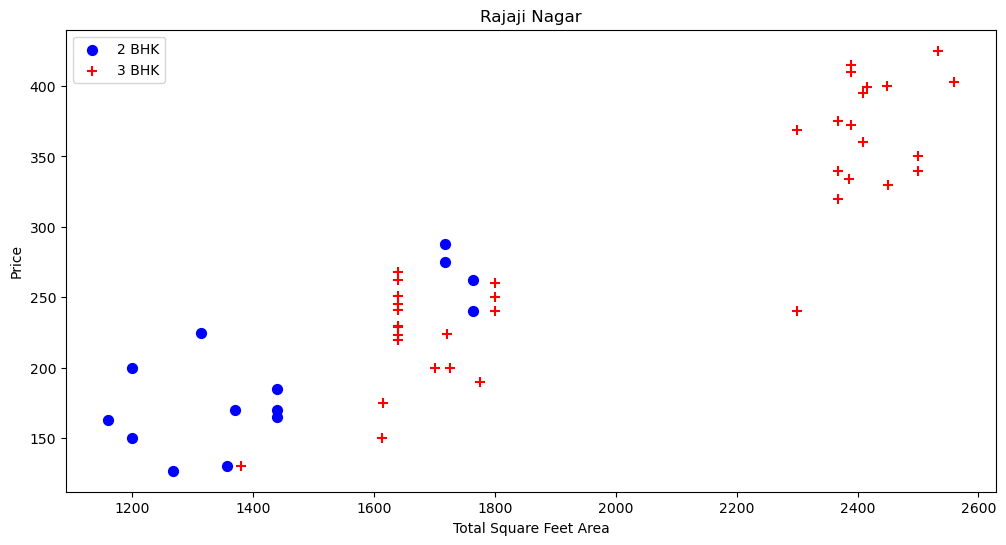

In [49]:
plot_scatter_chart(df3,'Rajaji Nagar')

In [50]:
# def remove_bhk_outliers(df):
#     excluded_indices = np.array([])
#     for location, location_df in df.groupby('location'):
#         bhk_stats = {}
#         for bhk, bhk_df in location_df.groupby('bhk'):
            

In [51]:
df3.head(15)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,3.0,44.0,3,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,2.0,43.0,2,4540.654699
6,Devarachikkanahalli,2 BHK,1130.0,2.0,2.0,36.0,2,3185.840708
7,Devarachikkanahalli,3 BHK,1417.0,2.0,2.0,76.0,3,5363.443896
8,Devarachikkanahalli,2 BHK,1230.0,2.0,1.0,58.0,2,4715.447154
9,Devarachikkanahalli,3 BHK,1705.0,3.0,2.0,75.0,3,4398.826979


In [52]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    # Here we are selecting each location 
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        
        # Here we we divide the nunmber of bhk for each location selected in "location_df"(eg : 2bhk , 3bhk)
        for bhk, bhk_df in location_df.groupby('bhk'):
            # Here for each bhk we are storing the values such as 'mean', 'std', 'count' for each bhk's(eg : 2bhk , 3bhk)
            # Structure looks like 
             # {
             #        '1' : {
             #            'mean': 4000,
             #            'std: 2000,
             #            'count': 34
             #        },
             #        '2' : {
             #            'mean': 4300,
             #            'std: 2300,
             #            'count': 22
             #        },    
             # }
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            
            if stats and stats['count']>5:  
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
            
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)
df4.shape

(7365, 8)

In [53]:
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509
5,Devarachikkanahalli,2 BHK,947.0,2.0,2.0,43.0,2,4540.654699


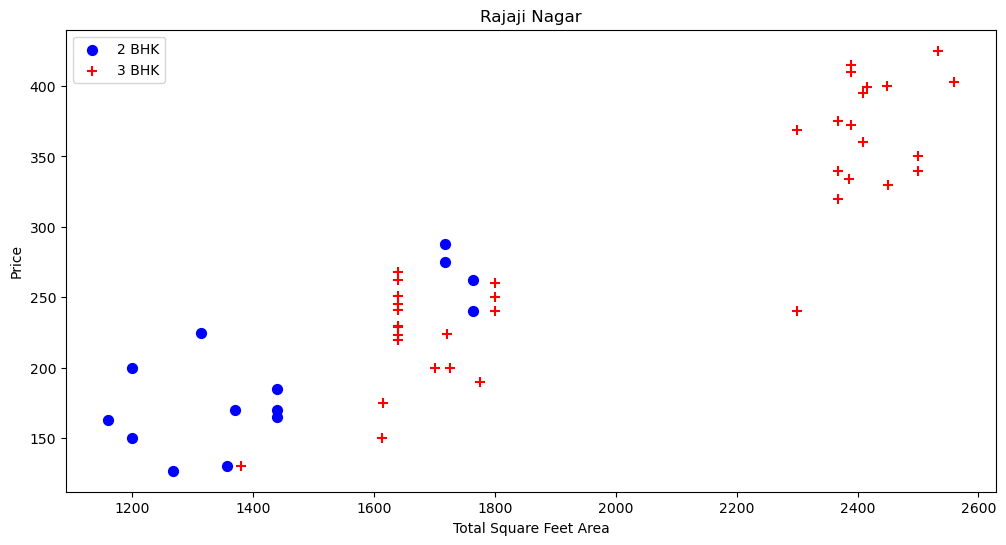

In [54]:
plot_scatter_chart(df4,'Rajaji Nagar')

Text(0, 0.5, 'Count')

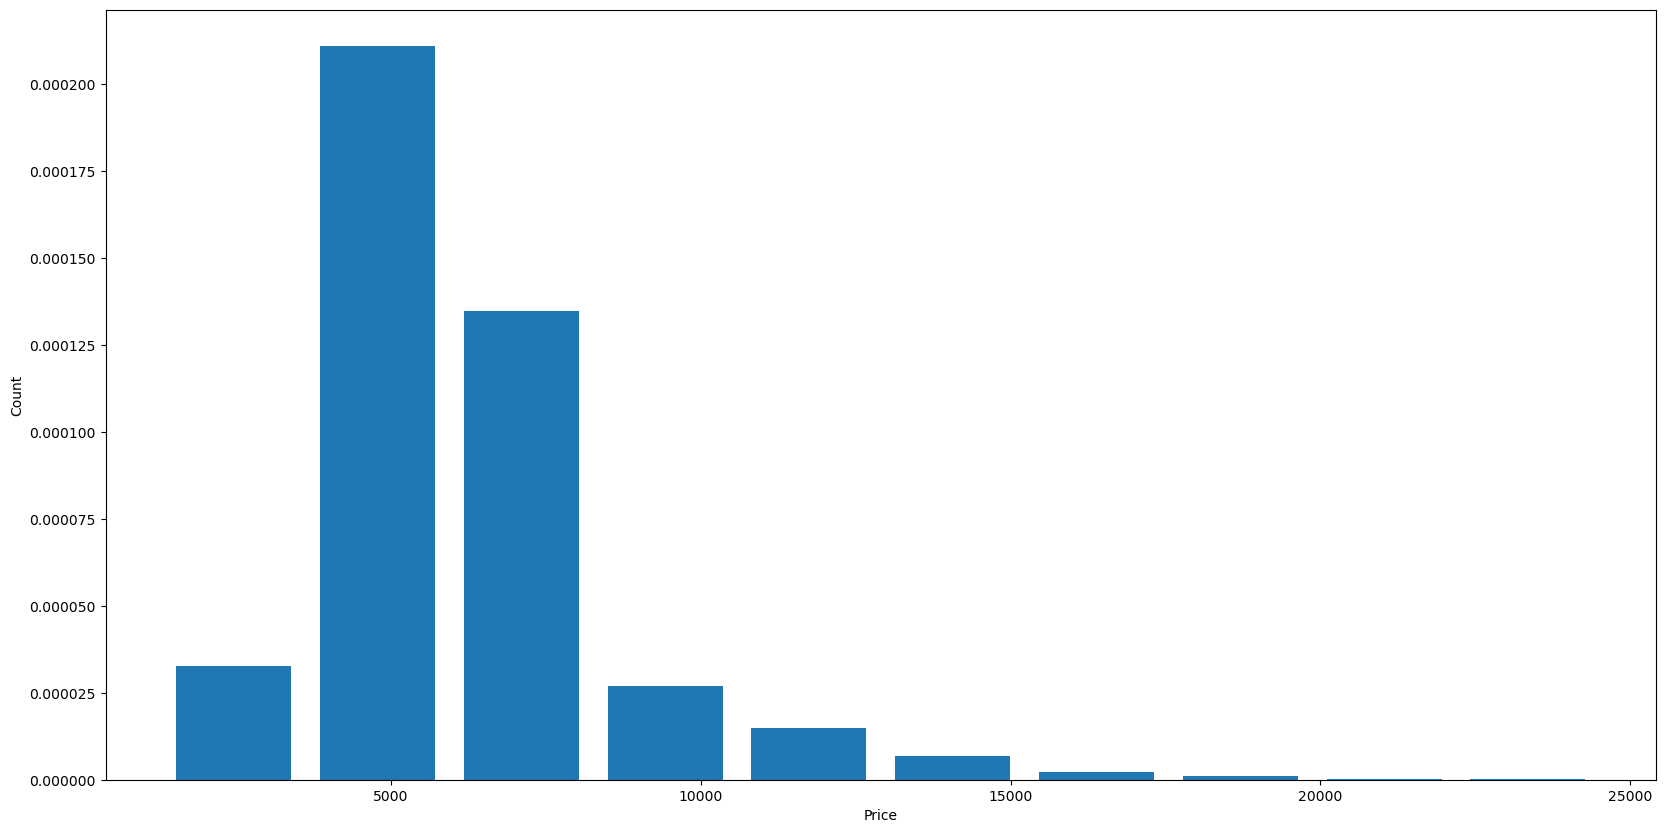

In [55]:
# Bar Plot
plt.figure(figsize = (20,10))
plt.hist(df4.price_per_sqft,rwidth = 0.8,density = True)
plt.xlabel("Price")
plt.ylabel("Count")

In [56]:
df4.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [57]:
df4[df4.bath > 10]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
5300,Neeladri Nagar,10 BHK,4000.0,12.0,2.0,160.0,10,4000.000000
8525,other,10 BHK,12000.0,12.0,2.0,525.0,10,4375.000000
8614,other,16 BHK,10000.0,16.0,2.0,550.0,16,5500.000000
9353,other,11 BHK,6000.0,12.0,2.0,150.0,11,2500.000000
9685,other,13 BHK,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

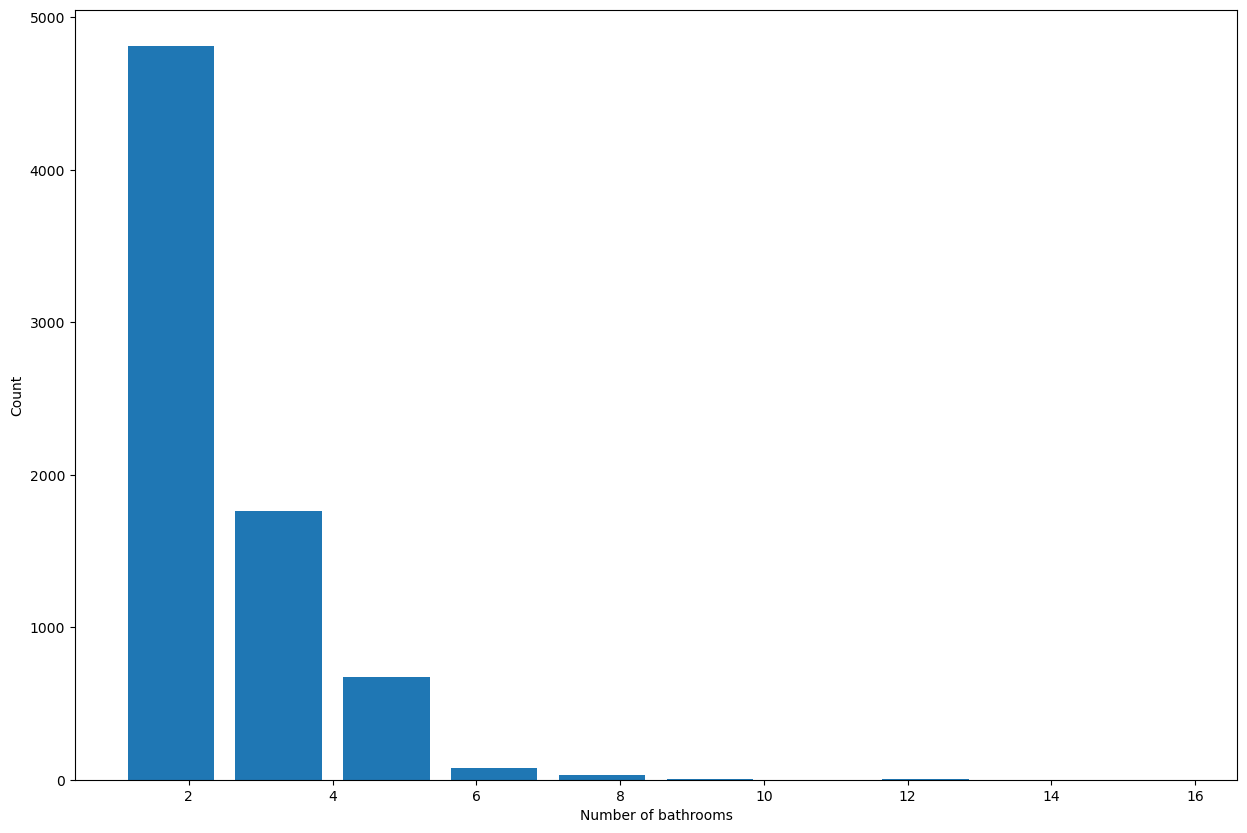

In [58]:
plt.figure(figsize = (15,10))
plt.hist(df4.bath,rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [59]:
df4.shape

(7365, 8)

In [60]:
df4[df4.bath > df4.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1645,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
5261,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429
6739,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
8449,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689


In [61]:
df5 = df4[df4.bath < df4.bhk+2]

In [62]:
df5.shape

(7287, 8)

In [63]:
# New data frame after dropping size and price_per_sqft

df6 = df5.drop(columns = ['size','price_per_sqft'],axis = 1)

In [64]:
df6.head()

,location,total_sqft,bath,balcony,price,bhk
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2


In [65]:
dummies = pd.get_dummies(df6.location,dtype = int)
dummies.head()
dummies.drop('other',axis  = 1, inplace = True)

In [66]:
df7 = pd.concat([df6,dummies],axis=1)

In [67]:
df7

,location,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10280,other,1200.0,2.0,3.0,70.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10281,other,1800.0,1.0,1.0,200.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10284,other,1353.0,2.0,2.0,110.0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10285,other,812.0,1.0,0.0,26.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df8 = df7.drop(columns = 'location', axis  = 1)
df8.head()

,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df8.shape

(7287, 246)

# Feature Engineering

In [70]:
X = df8.drop(columns = 'price',axis = 1)
y = df8['price']

In [193]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [72]:
X_train.shape

(5829, 245)

In [73]:
X_test.shape

(1458, 245)

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

lm_model = LinearRegression()
lm_model.fit(X_train,y_train)
lm_model.score(X_test,y_test)

0.8501980204545085

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [76]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42)

cross_val_score(LinearRegression() , X, y, cv=cv)

array([0.85019802, 0.86487301, 0.83208985, 0.79951742, 0.85459513])

### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

In [165]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                # 'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)


,model,best_score,best_params
0,linear_regression,0.821385,{}
1,lasso,0.673797,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.723092,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


# Predicting the value

In [177]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [205]:
np.where(X.columns == '2nd Phase Judicial Layout')[0][0]

7

In [203]:
beep = np.zeros(10)
beep

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [201]:
x = np.zeros(len(X.columns))
len(x)

245

In [233]:
def predict_price(location,sqft,bath_room,balcony,bhk):
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns)) #Creating a vector(containing zeros) having length same as length of X
    x[0] = sqft
    x[1] = bath_room
    x[2] = balcony
    x[3] = bhk

    if loc_index >= 0:
        x[loc_index] = 1
    # print('Value of x is ',x)
    return lm_model.predict([x])

In [255]:
# 'Area name', square_feet, number if bathrooms, number of balcony, number of rooms 

predict_price('1st Block Jayanagar',1000,2,2,2)[0]

193.92474388220705

In [259]:
predict_price('1st Phase JP Nagar',1000,2,2,2)[0]

88.25062712722597

In [267]:
predict_price('1st Phase JP Nagar',1000,3,3,3)[0]

91.33183050551915

# Storing in pickle 

In [271]:
import pickle
with open('bangalore_home_price_prediction_model.pickle','wb') as f:
    pickle.dump(lm_model,f)

In [273]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open("columns.jso n","w") as f:
    f.write(json.dumps(columns))